Nuestro conjunto de datos tratan de un conjunto de datos meteorlógicos de Madrid a lor largo del tiempo.
El primer modelo es una regresión lineal simple. Es un método que sirve para modelar la relación entre dos variables cuantitativas.

En este caso, hemos probado dos diferentes variables objetivo. En el primero, nuestra variable objetivo era el rocio, y nuestra variable independiente era la temperatura mínima. 

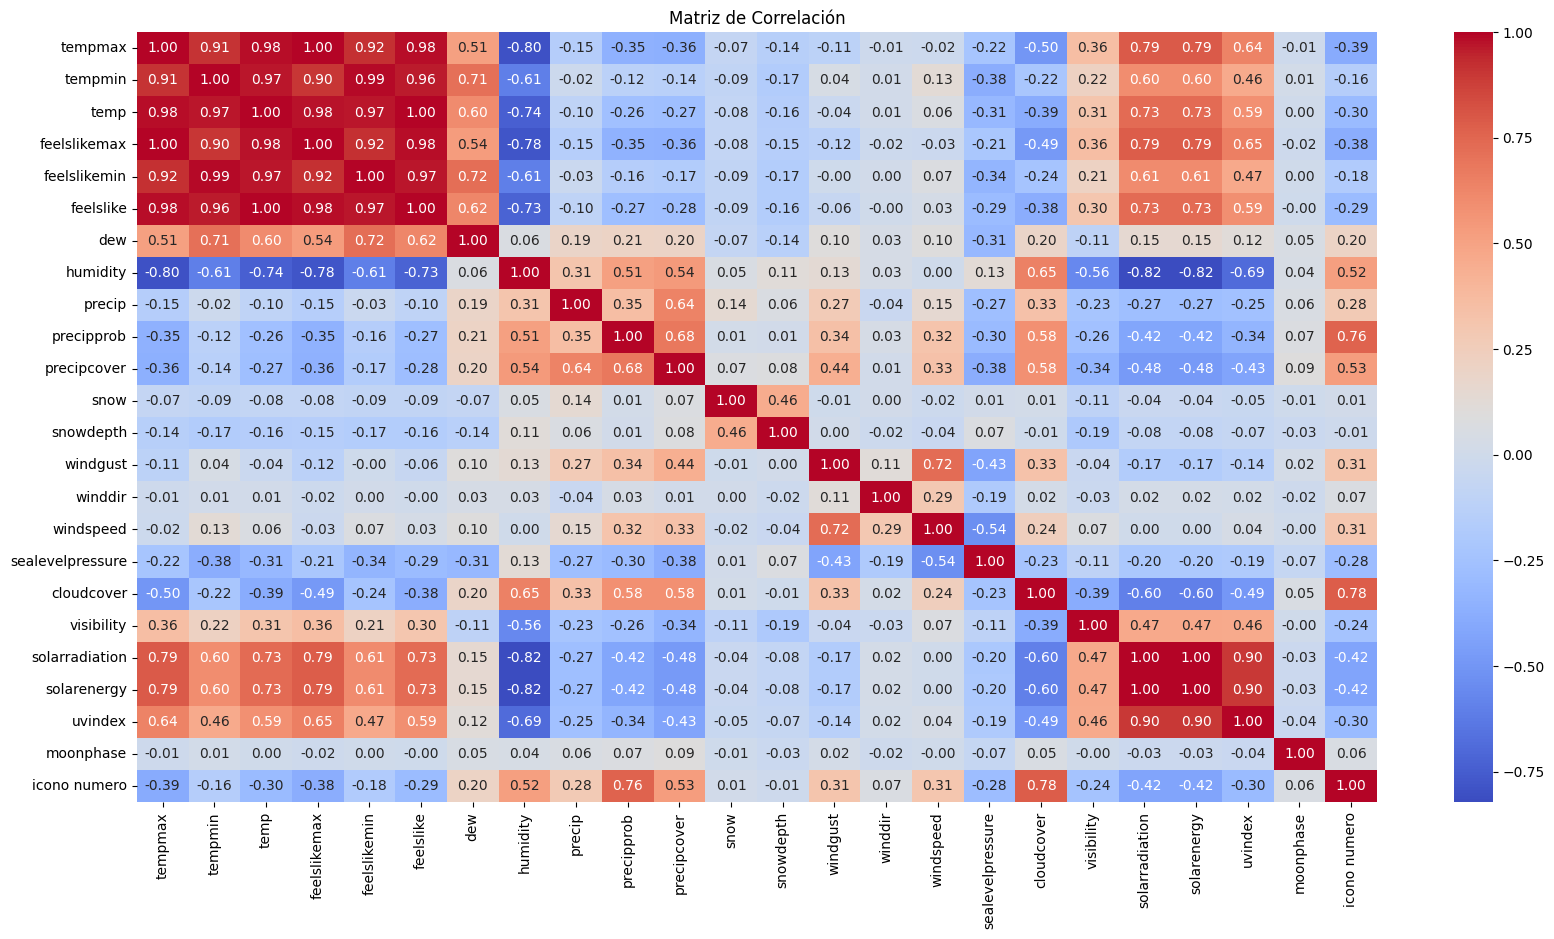

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icono numero
tempmax,1.000000,0.908133,0.980914,0.995679,0.915919,0.978981,0.514210,-0.798214,-0.153775,-0.354713,...,-0.012025,-0.018332,-0.224484,-0.499130,0.358258,0.788198,0.788245,0.644064,-0.013787,-0.391924
tempmin,0.908133,1.000000,0.966940,0.904816,0.991821,0.962796,0.713233,-0.608382,-0.023272,-0.124609,...,0.009019,0.129589,-0.379365,-0.217347,0.223843,0.598027,0.597826,0.464134,0.013442,-0.158116
temp,0.980914,0.966940,1.000000,0.975814,0.967292,0.996054,0.603231,-0.743578,-0.102360,-0.262409,...,0.006284,0.062199,-0.313160,-0.386403,0.311104,0.734124,0.734017,0.585965,0.000212,-0.297123
feelslikemax,0.995679,0.904816,0.975814,1.000000,0.916454,0.979878,0.536965,-0.780423,-0.149354,-0.349597,...,-0.018921,-0.030529,-0.213507,-0.485056,0.356609,0.786265,0.786291,0.651531,-0.016061,-0.379758
feelslikemin,0.915919,0.991821,0.967292,0.916454,1.000000,0.971496,0.720613,-0.605143,-0.034882,-0.156656,...,0.004629,0.072805,-0.335020,-0.236738,0.213664,0.605714,0.605516,0.471721,0.002486,-0.181396
feelslike,0.978981,0.962796,0.996054,0.979878,0.971496,1.000000,0.624179,-0.727089,-0.102044,-0.268055,...,-0.000439,0.031063,-0.290156,-0.379183,0.304562,0.732768,0.732648,0.589317,-0.004188,-0.294240
dew,0.514210,0.713233,0.603231,0.536965,0.720613,0.624179,1.000000,0.061382,0.190516,0.206104,...,0.032236,0.095749,-0.311633,0.195088,-0.105314,0.152337,0.152324,0.115896,0.046596,0.204007
humidity,-0.798214,-0.608382,-0.743578,-0.780423,-0.605143,-0.727089,0.061382,1.000000,0.312866,0.510525,...,0.032038,0.002328,0.130814,0.650310,-0.560238,-0.822310,-0.822206,-0.692091,0.039865,0.522863
precip,-0.153775,-0.023272,-0.102360,-0.149354,-0.034882,-0.102044,0.190516,0.312866,1.000000,0.354219,...,-0.041111,0.146041,-0.273459,0.334451,-0.227170,-0.270296,-0.270720,-0.253488,0.058294,0.276752
precipprob,-0.354713,-0.124609,-0.262409,-0.349597,-0.156656,-0.268055,0.206104,0.510525,0.354219,1.000000,...,0.034061,0.322473,-0.300776,0.580686,-0.256772,-0.422036,-0.422469,-0.336138,0.071881,0.764922


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import numpy as np
from scipy.stats import skew
from scipy.stats.mstats import winsorize

#Cogemos todos los datos y los juntamos todos en un mismo dataframe
df = pd.read_csv("Madrid 2022-02-08 to 2024-11-01.csv")
df2 = pd.read_csv("madrid 2019-04-08 to 2022-01-01.csv")
df3 =pd.read_csv("madrid 2022-01-02 to 2022-02-07.csv")
df = pd.concat([df, df2, df3], ignore_index=True)

#Ordenamos los datos por fecha
df = df.sort_values(by='datetime', ascending=True) 
df.reset_index(drop=True, inplace=True)

#Eliminamos la columna name debido a que todos los datos son de Madrid
df.drop("name", axis=1, inplace=True)

# Convertir la columna de fecha a tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'])

#Categorizar la columna icon
labelencoder=LabelEncoder()
df["icono numero"]= labelencoder.fit_transform(df["icon"])
df

#Correlaciones
correlaciones = df[["tempmax","tempmin","temp","feelslikemax","feelslikemin","feelslike","dew","humidity","precip","precipprob","precipcover","snow","snowdepth","windgust","winddir","windspeed","sealevelpressure","cloudcover","visibility","solarradiation","solarenergy","uvindex","moonphase", "icono numero"]].corr()

# Configuramos el tamaño de la figura para que se vea bien
plt.figure(figsize=(20,10))

# Creamos un mapa de calor (heatmap) con la matriz de correlación del DataFrame `df`
sns.heatmap(
    correlaciones,        # Calculamos la matriz de correlación
    annot=True,       # Mostramos los valores numéricos dentro de cada celda
    cmap='coolwarm',  # Usamos una paleta de colores que va de azul a rojo
    fmt=".2f"         # Limitamos los valores a 2 decimales
)

# Añadimos un título al gráfico
plt.title("Matriz de Correlación")

# Mostramos la gráfica generada
plt.show()

correlaciones


In [3]:
#Comprobamos si hay valores nan en las variables escogidas
dew_nan = df["dew"].isna()
print(f"Dew: {dew_nan.sum()}")

tempmin_nan = df["tempmin"].isna()
print(f"Tempmin: {tempmin_nan.sum()}")

#Comprobamos si hay filas duplicadas en el df
duplicados = df.duplicated()
print(f"Duplicados: {duplicados.sum()}")

Dew: 0
Tempmin: 0
Duplicados: 0


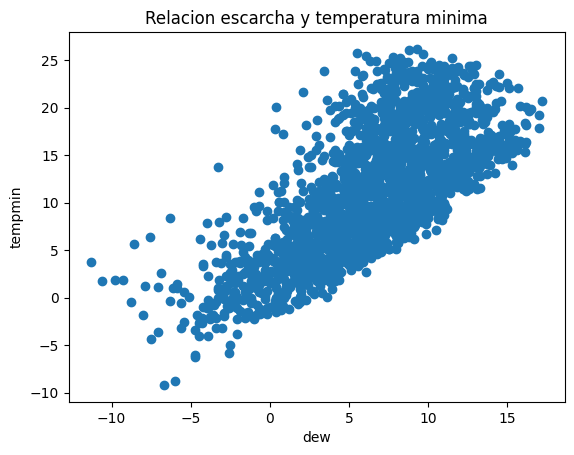

In [4]:
# Graficar  dew y tempmin
plt.scatter(df["dew"],df["tempmin"])
plt.xlabel("dew")
plt.ylabel("tempmin")
plt.title("Relacion escarcha y temperatura minima")
plt.show()

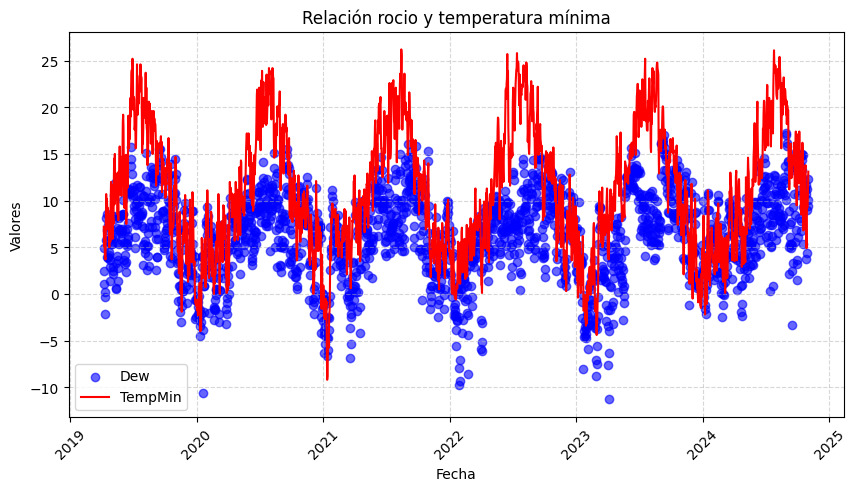

In [5]:
# Graficar dew como puntos y tempmin como línea
plt.figure(figsize=(10, 5))  # Ajustar tamaño de la gráfica
plt.scatter(df["datetime"], df["dew"], label="Dew", color="blue", alpha=0.6)
plt.plot(df["datetime"], df["tempmin"], label="TempMin", color="red")

# Mejoras en la visualización
plt.title("Relación rocio y temperatura mínima")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor lectura
plt.grid(True, linestyle="--", alpha=0.5)  # Agregar rejilla suave

# Mostrar gráfica
plt.show()

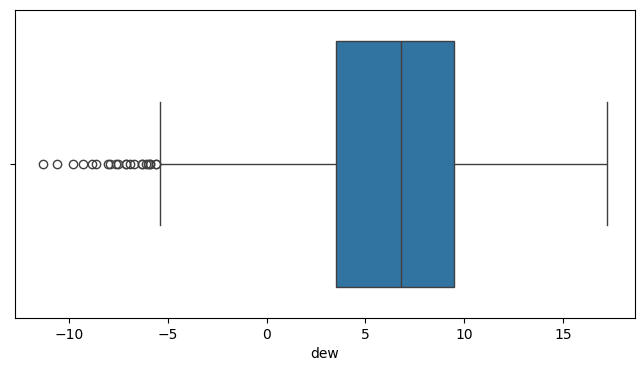

Valores atípicos positivos detectados:
 Empty DataFrame
Columns: [datetime, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, preciptype, snow, snowdepth, windgust, windspeed, winddir, sealevelpressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, severerisk, sunrise, sunset, moonphase, conditions, description, icon, stations, icono numero, z_score]
Index: []

[0 rows x 34 columns]
Valores atípicos negativos detectados:
        datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
287  2020-01-20      6.4      1.7   4.0           2.2          -2.6   
1026 2022-01-28     14.5      1.2   7.7          14.5           1.2   
1027 2022-01-29     16.3      1.9   8.5          16.3           0.4   
1028 2022-01-30     16.4      1.9   8.5          16.4           0.5   
1051 2022-02-22     19.4      5.6  12.4          19.4           3.7   
1385 2023-01-22      9.0     -1.8   3.7           6.6          -2.9   


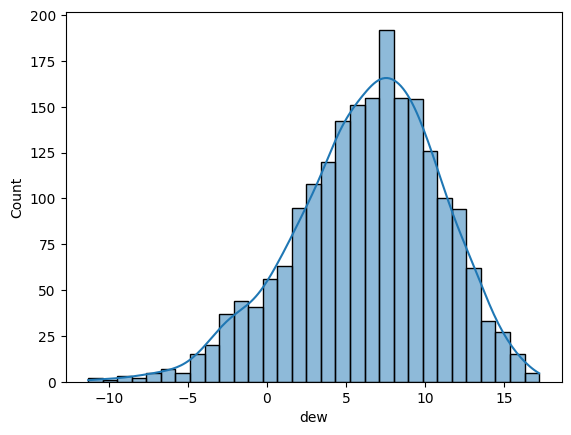

Skewness: -0.4517027902436499


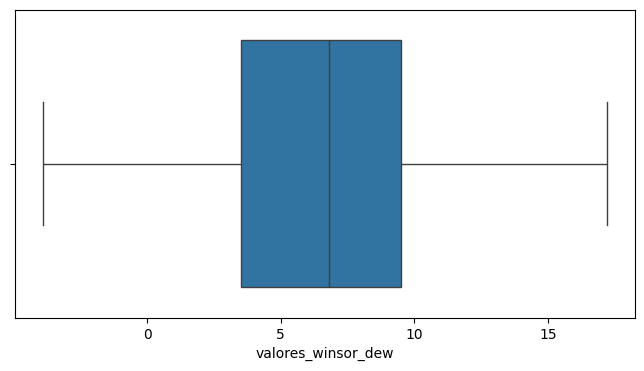

Skewness: -0.2924572821308798


In [6]:
# Creamos el Boxplot dew
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['dew'])

# Mostramos el gráfico
plt.show()

# Calcular el Z-score
df['z_score'] = zscore(df['dew'])

# Filtrar outliers poisitivos y negativos
outliers_positivos = df[df['z_score'] > 3]   # Solo valores muy altos
outliers_negativos = df[df['z_score'] < -3]  # Solo valores muy bajos

print("Valores atípicos positivos detectados:\n", outliers_positivos)
print("Valores atípicos negativos detectados:\n", outliers_negativos)

# Calcular cuartiles
Q1 = np.percentile(df['dew'], 25)  # Primer cuartil (Q1)
Q3 = np.percentile(df['dew'], 75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df[(df['dew'] < limite_inferior) | (df['dew'] > limite_superior)]
print("Outliers encontrados:\n", outliers)

#Grafico distribucion
sns.histplot(df['dew'], kde=True)
plt.show()

#Calculamos el skew
print("Skewness:", skew(df['dew']))

#Winsorizacion
df['valores_winsor_dew'] = winsorize(df['dew'], limits=[0.02, 0]) 

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['valores_winsor_dew'])

# Mostramos el gráfico
plt.show()

print("Skewness:", skew(df['valores_winsor_dew']))



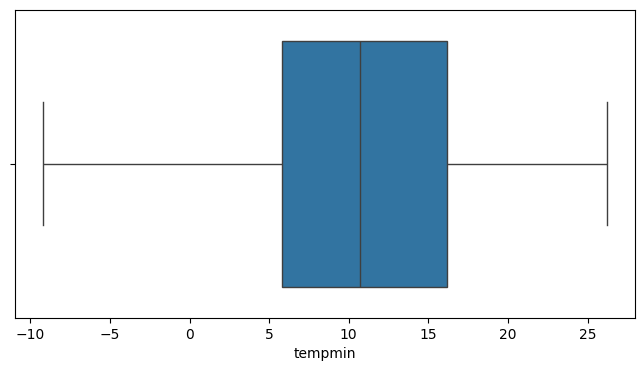

Valores atípicos positivos detectados:
 Empty DataFrame
Columns: [datetime, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, preciptype, snow, snowdepth, windgust, windspeed, winddir, sealevelpressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, severerisk, sunrise, sunset, moonphase, conditions, description, icon, stations, icono numero, z_score, valores_winsor_dew]
Index: []

[0 rows x 35 columns]
Valores atípicos negativos detectados:
       datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  \
645 2021-01-12      2.0     -9.2  -3.5           2.0          -9.2       -3.6   

     dew  humidity  precip  ...              sunrise               sunset  \
645 -3.9      79.3     0.0  ...  2021-01-12T08:36:59  2021-01-12T18:09:40   

    moonphase  conditions                           description       icon  \
645      0.97       Clear  Clear conditions throughout the day.  clear-day   

  

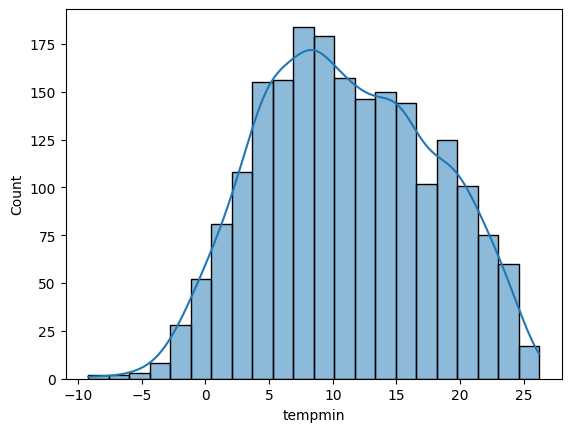

Skewness: 0.05549120967704703


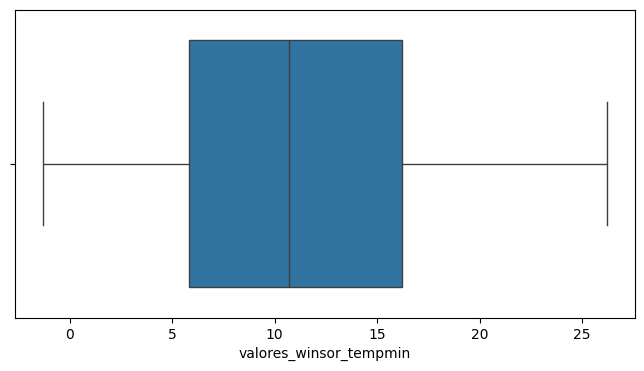

Skewness: 0.11588096588373215


In [7]:
# Creamos el Boxplot de tempmin
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['tempmin'])

# Mostramos el gráfico
plt.show()

# Calcular el Z-score
df['z_score'] = zscore(df['tempmin'])

# Filtrar outliers poisitivos y negativos
outliers_positivos = df[df['z_score'] > 3]   # Solo valores muy altos
outliers_negativos = df[df['z_score'] < -3]  # Solo valores muy bajos

print("Valores atípicos positivos detectados:\n", outliers_positivos)
print("Valores atípicos negativos detectados:\n", outliers_negativos)

# Calcular cuartiles
Q1 = np.percentile(df['tempmin'], 25)  # Primer cuartil (Q1)
Q3 = np.percentile(df['tempmin'], 75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df[(df['tempmin'] < limite_inferior) | (df['tempmin'] > limite_superior)]
print("Outliers encontrados:\n", outliers) # Los valores que están fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR] se consideran outliers.

#Grafico distribucion
sns.histplot(df['tempmin'], kde=True)
plt.show()

#Calculamos el skew
print("Skewness:", skew(df['tempmin']))

#Winsorizacion
df['valores_winsor_tempmin'] = winsorize(df['tempmin'], limits=[0.02, 0]) 

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['valores_winsor_tempmin']) #df['valores'] es una columna de un DataFrame que contiene los datos que queremos analizar.

# Mostramos el gráfico
plt.show()
print("Skewness:", skew(df['valores_winsor_tempmin']))



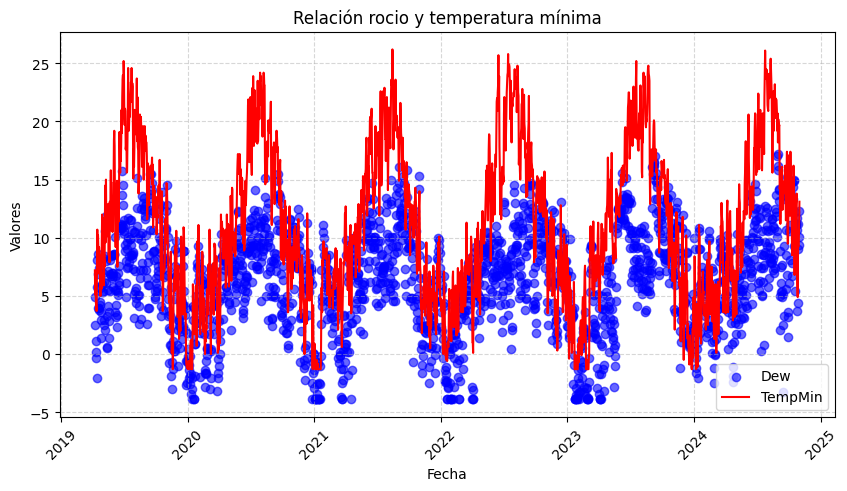

In [8]:
# Graficar dew como puntos y tempmin como línea
plt.figure(figsize=(10, 5))  # Ajustar tamaño de la gráfica
plt.scatter(df["datetime"], df["valores_winsor_dew"], label="Dew", color="blue", alpha=0.6)
plt.plot(df["datetime"], df["valores_winsor_tempmin"], label="TempMin", color="red")

# Mejoras en la visualización
plt.title("Relación rocio y temperatura mínima")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor lectura
plt.grid(True, linestyle="--", alpha=0.5)  # Agregar rejilla suave

# Mostrar gráfica
plt.show()


Datos de entrenamiento: 1628
Datos de prueba: 407
Error MAE: 2.61 (puntos de progresión)
RMSE: 3.15
                            OLS Regression Results                            
Dep. Variable:     valores_winsor_dew   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     1654.
Date:                Wed, 18 Jun 2025   Prob (F-statistic):          4.24e-250
Time:                        20:28:17   Log-Likelihood:                -4163.8
No. Observations:                1628   AIC:                             8332.
Df Residuals:                    1626   BIC:                             8342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

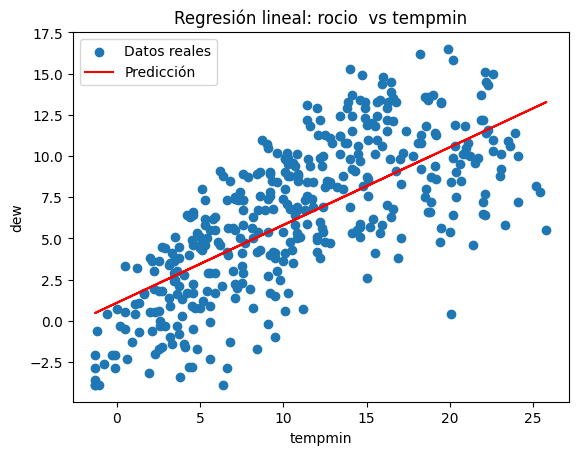

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#División de datos
X_train, X_test, y_train, y_test = train_test_split(df[["valores_winsor_tempmin"]], df["valores_winsor_dew"], test_size=0.2, random_state=42)

print("Datos de entrenamiento:", len(X_train))
print("Datos de prueba:", len(X_test))

# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")

#cuadratico
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

#Prueba de f y p
X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()

print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

#mape
mask = y_test != 0  # Crear una máscara para excluir valores de y_test que sean 0
mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100
print(f"MAPE: {mape:.2f}%")


#r2
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

# Graficar
plt.scatter(X_test, y_test, label="Datos reales")
plt.plot(X_test, y_pred, color="red", label="Predicción")
plt.xlabel("tempmin")
plt.ylabel("dew")
plt.title("Regresión lineal: rocio  vs tempmin")
plt.legend()
plt.show()


In [10]:
# Función para hacer predicciones con nuevos valores de BMI
def predecir_progresion(tempmin):
    prediccion = modelo.predict([[tempmin]])[0]
    print(f"Predicción: Si hay una temperatura minima de {tempmin:.2f} el dia tendrá un rocio estimado de {prediccion:.2f}.")

predecir_progresion(33)


Predicción: Si hay una temperatura minima de 33.00 el dia tendrá un rocio estimado de 16.67.


c:\Users\lalos\OneDrive\Escritorio\proyecto temperatura\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Como conclusión, podemos decir que, basandonos en el coeficiente de determinación, que con la temperatura mínima no somos capaces de crear un modelo que puediera predecir el rocio con precisión.

Hacemos un modelo con otras variables debido a que el modelo anterior no nos dio resultados satisfactorios.
En este caso, utilizamos como variable objetivo la radiación solar y como variable indepenciente la energía solar. 

In [11]:
#Comprobamos si hay valores nan en las variables escogidas
dew_nan = df["solarradiation"].isna()
print(f"Solarradiation: {dew_nan.sum()}")

tempmin_nan = df["solarenergy"].isna()
print(f"Solarenergy: {tempmin_nan.sum()}")

Solarradiation: 0
Solarenergy: 0


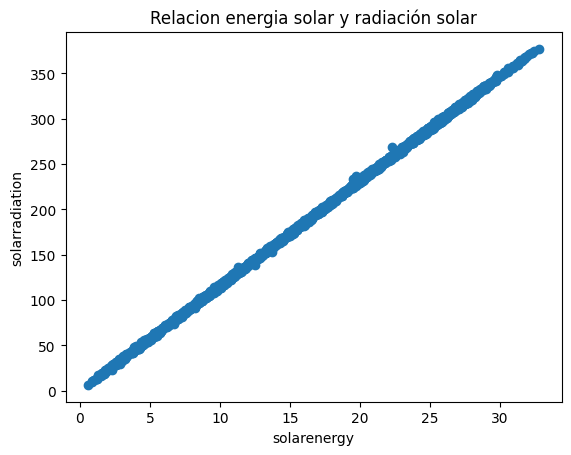

In [12]:
# Graficar  solarenergy y solarradiation
plt.scatter(df["solarenergy"],df["solarradiation"])
plt.xlabel("solarenergy")
plt.ylabel("solarradiation")
plt.title("Relacion energia solar y radiación solar")
plt.show()

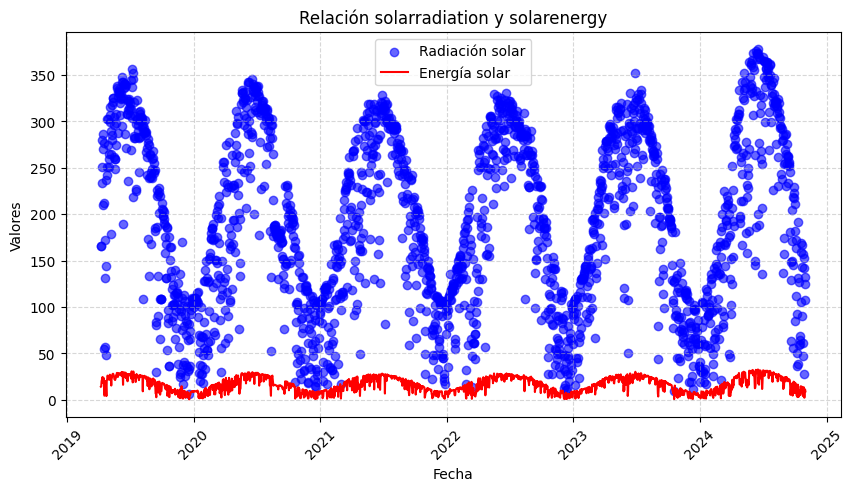

In [13]:
# Graficar solarradiation como puntos y soloarenergy como línea
plt.figure(figsize=(10, 5))  # Ajustar tamaño de la gráfica
plt.scatter(df["datetime"], df["solarradiation"], label="Radiación solar", color="blue", alpha=0.6)
plt.plot(df["datetime"], df["solarenergy"], label="Energía solar", color="red")

# Mejoras en la visualización
plt.title("Relación solarradiation y solarenergy")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor lectura
plt.grid(True, linestyle="--", alpha=0.5)  # Agregar rejilla suave

# Mostrar gráfica
plt.show()

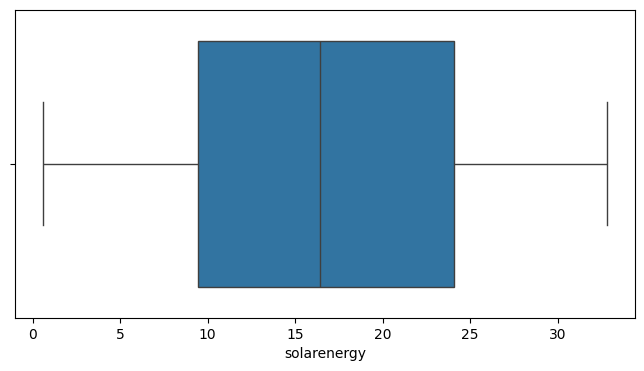

Valores atípicos positivos detectados:
 Empty DataFrame
Columns: [datetime, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, preciptype, snow, snowdepth, windgust, windspeed, winddir, sealevelpressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, severerisk, sunrise, sunset, moonphase, conditions, description, icon, stations, icono numero, z_score, valores_winsor_dew, valores_winsor_tempmin]
Index: []

[0 rows x 36 columns]
Valores atípicos negativos detectados:
 Empty DataFrame
Columns: [datetime, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, preciptype, snow, snowdepth, windgust, windspeed, winddir, sealevelpressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, severerisk, sunrise, sunset, moonphase, conditions, description, icon, stations, icono numero, z_score, valores_winsor_dew, valores_winsor_tempmin]
Index: []

[0 rows 

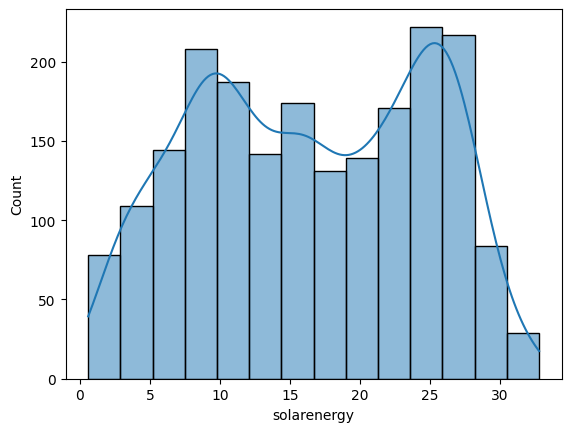

Skewness: -0.05475763255283841


In [14]:
# Creamos el Boxplot solarenergy
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['solarenergy'])

# Mostramos el gráfico
plt.show()

# Calcular el Z-score
df['z_score'] = zscore(df['solarenergy'])

# Filtrar outliers poisitivos y negativos
outliers_positivos = df[df['z_score'] > 3]   # Solo valores muy altos
outliers_negativos = df[df['z_score'] < -3]  # Solo valores muy bajos

print("Valores atípicos positivos detectados:\n", outliers_positivos)
print("Valores atípicos negativos detectados:\n", outliers_negativos)

# Calcular cuartiles
Q1 = np.percentile(df['solarenergy'], 25)  # Primer cuartil (Q1)
Q3 = np.percentile(df['solarenergy'], 75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df[(df['solarenergy'] < limite_inferior) | (df['solarenergy'] > limite_superior)]
print("Outliers encontrados:\n", outliers)

#Grafico distribucion
sns.histplot(df['solarenergy'], kde=True)
plt.show()

#Calculamos el skew
print("Skewness:", skew(df['solarenergy']))

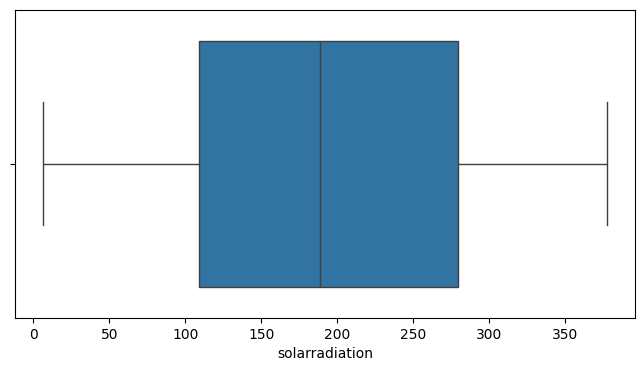

Valores atípicos positivos detectados:
 Empty DataFrame
Columns: [datetime, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, preciptype, snow, snowdepth, windgust, windspeed, winddir, sealevelpressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, severerisk, sunrise, sunset, moonphase, conditions, description, icon, stations, icono numero, z_score, valores_winsor_dew, valores_winsor_tempmin]
Index: []

[0 rows x 36 columns]
Valores atípicos negativos detectados:
 Empty DataFrame
Columns: [datetime, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, preciptype, snow, snowdepth, windgust, windspeed, winddir, sealevelpressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, severerisk, sunrise, sunset, moonphase, conditions, description, icon, stations, icono numero, z_score, valores_winsor_dew, valores_winsor_tempmin]
Index: []

[0 rows 

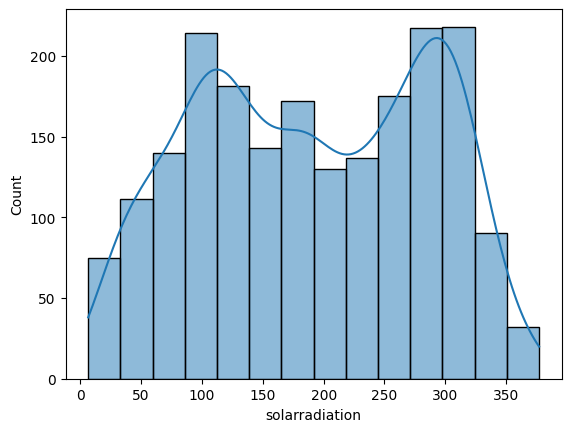

Skewness: -0.054639819228837344


In [15]:
# Creamos el Boxplot solarenergy
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['solarradiation'])

# Mostramos el gráfico
plt.show()

# Calcular el Z-score
df['z_score'] = zscore(df['solarradiation'])

# Filtrar outliers poisitivos y negativos
outliers_positivos = df[df['z_score'] > 3]   # Solo valores muy altos
outliers_negativos = df[df['z_score'] < -3]  # Solo valores muy bajos

print("Valores atípicos positivos detectados:\n", outliers_positivos)
print("Valores atípicos negativos detectados:\n", outliers_negativos)

# Calcular cuartiles
Q1 = np.percentile(df['solarradiation'], 25)  # Primer cuartil (Q1)
Q3 = np.percentile(df['solarradiation'], 75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df[(df['solarradiation'] < limite_inferior) | (df['solarradiation'] > limite_superior)]
print("Outliers encontrados:\n", outliers)

#Grafico distribucion
sns.histplot(df['solarradiation'], kde=True)
plt.show()

#Calculamos el skew
print("Skewness:", skew(df['solarradiation']))

Datos de entrenamiento: 1628
Datos de prueba: 407
Error MAE: 0.92 (puntos de progresión)
RMSE: 1.18
                            OLS Regression Results                            
Dep. Variable:         solarradiation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.920e+06
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:28:20   Log-Likelihood:                -2710.4
No. Observations:                1628   AIC:                             5425.
Df Residuals:                    1626   BIC:                             5436.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

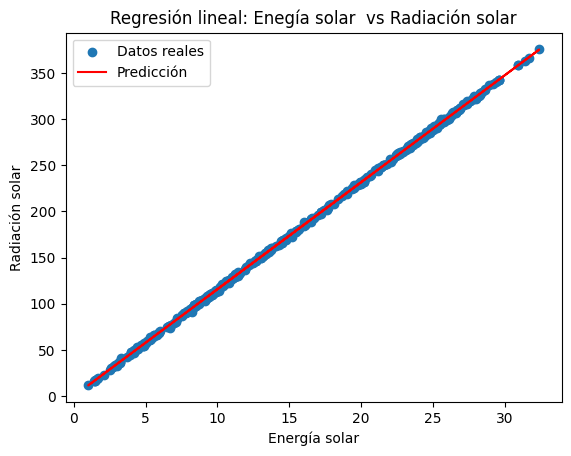

In [16]:
#División de datos
X_train, X_test, y_train, y_test = train_test_split(df[["solarenergy"]], df["solarradiation"], test_size=0.2, random_state=42)

print("Datos de entrenamiento:", len(X_train))
print("Datos de prueba:", len(X_test))

# Entrenar el modelo de regresión lineal
modelo2 = LinearRegression()
modelo2.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo2.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")

#cuadratico
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

#Prueba de f y p
X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()

print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

#mape
mask = y_test != 0  # Crear una máscara para excluir valores de y_test que sean 0
mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100
print(f"MAPE: {mape:.2f}%")


#r2
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

# Graficar
plt.scatter(X_test, y_test, label="Datos reales")
plt.plot(X_test, y_pred, color="red", label="Predicción")
plt.xlabel("Energía solar")
plt.ylabel("Radiación solar")
plt.title("Regresión lineal: Enegía solar  vs Radiación solar")
plt.legend()
plt.show()

In [17]:
# Función para hacer predicciones con nuevos valores de BMI
def predecir_progresion(solarenergy):
    prediccion = modelo2.predict([[solarenergy]])[0]
    print(f"Predicción: Si hay una energía solar de {solarenergy:.2f} la radiación solar será {prediccion:.2f}.")

predecir_progresion(13)



Predicción: Si hay una energía solar de 13.00 la radiación solar será 150.48.


c:\Users\lalos\OneDrive\Escritorio\proyecto temperatura\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Como conclusión de este modelo, podemos decir que con los datos de energía solar, podemos predecir la radiación solar de manera precisa casi el 100 % de las veces. 